In [2]:
path = "/home/jiahang/DiGress/chain_results/2024-04-13/11-28-34-protein-debug-2/protein-debug-2/{stage}"

In [3]:
import torch
import pandas as pd

In [4]:
import os
import pickle
stage = 'valid'

def read_metrics(stage, path):
    directory = path.format(stage=stage)
    metrics = []
    for filename in os.listdir(directory):
        if filename.endswith('.pkl'):
            file_path = os.path.join(directory, filename)
            
            # Read the .pkl file
            with open(file_path, 'rb') as file:
                metric = pickle.load(file)
            metrics.append(metric)
    return metrics

metrics = read_metrics('valid', path)

In [5]:
import numpy as np
import pandas as pd
def process_metrics(metrics):
    metric_list = ['acc', 'prec', 'rec', 'ce']
    metrics_Gt_1_Gt = {'acc': [], 'prec': [], 'rec': [], 'ce': []}
    metrics_X_Gt = {'acc': [], 'prec': [], 'rec': [], 'ce': []}

    for metric_epoch in metrics:
        for metric_name in metric_list:
            metrics_Gt_1_Gt[metric_name].append(metric_epoch['Gt_1_Gt'][metric_name])
            metrics_X_Gt[metric_name].append(metric_epoch['X_Gt'][metric_name])
    
    num_epochs, num_steps = len(metrics_Gt_1_Gt['acc']), len(metrics_Gt_1_Gt['acc'][0])
    for metric_name in metric_list:
        metrics_Gt_1_Gt[metric_name] = torch.concat(metrics_Gt_1_Gt[metric_name]).numpy()
        metrics_X_Gt[metric_name] = torch.concat(metrics_X_Gt[metric_name]).numpy()

    epoch_idx = [0]
    epoch_idx.extend(list(range(9, 100, 10)))
    epoch_idx = np.repeat(epoch_idx, num_steps)

    step_idx = list(range(0, 20)) * 11

    dict_Gt_1_Gt = {'epoch_idx': epoch_idx, 'step_idx': step_idx}
    dict_Gt_1_Gt.update(metrics_Gt_1_Gt)

    dict_X_Gt = {'epoch_idx': epoch_idx, 'step_idx': step_idx}
    dict_X_Gt.update(metrics_X_Gt)

    df_Gt_1_Gt = pd.DataFrame(dict_Gt_1_Gt).melt(id_vars=['epoch_idx', 'step_idx'], value_vars=['acc', 'prec', 'rec', 'ce'], var_name='metric')
    df_X_Gt = pd.DataFrame(dict_X_Gt).melt(id_vars=['epoch_idx', 'step_idx'], value_vars=['acc', 'prec', 'rec', 'ce'], var_name='metric')
    
    return df_Gt_1_Gt, df_X_Gt

df_Gt_1_Gt_a, df_X_Gt_a = process_metrics(metrics)

In [6]:
df_Gt_1_Gt

,epoch_idx,step_idx,acc,prec,rec,ce
0,0,0,0.485014,0.008275,0.484444,0.124103
1,0,1,0.486147,0.008667,0.506667,0.161404
2,0,2,0.489469,0.008949,0.520000,0.189110
3,0,3,0.492986,0.009313,0.537778,0.213402
4,0,4,0.499277,0.009277,0.528889,0.236708
...,...,...,...,...,...,...
215,99,15,0.636357,0.008444,0.346667,0.428584
216,99,16,0.654722,0.007999,0.311111,0.424512
217,99,17,0.677465,0.007484,0.271111,0.412154
218,99,18,0.705521,0.008339,0.275556,0.386056


# Gt_1_Gt

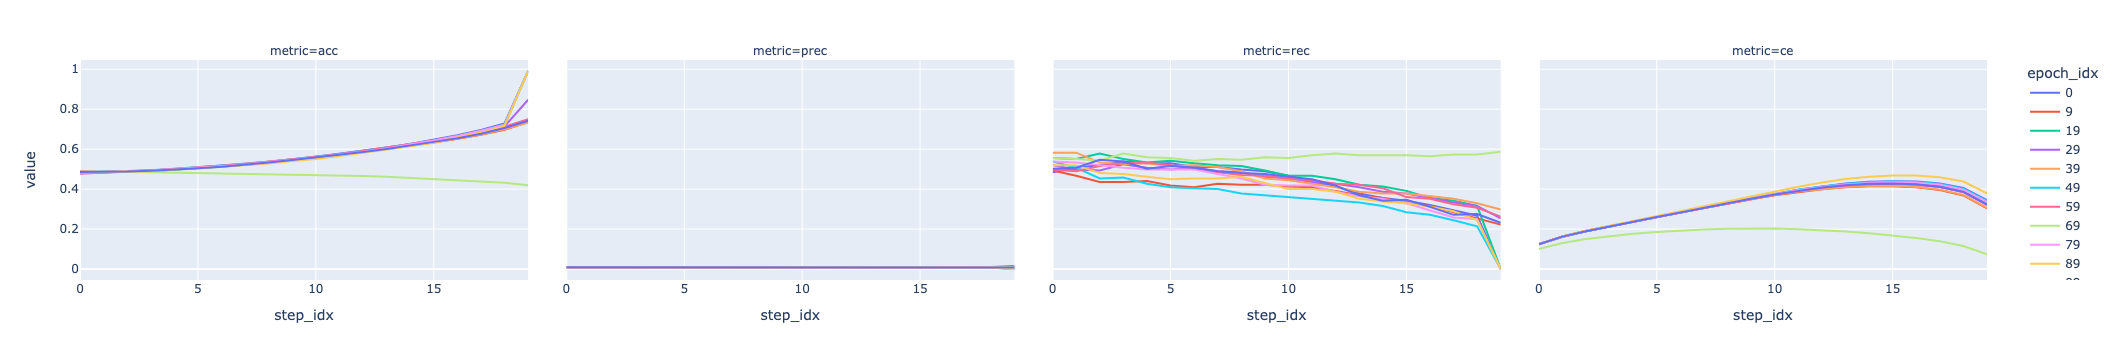

In [16]:
import plotly.express as px

fig = px.line(df_Gt_1_Gt_a, x="step_idx", y="value", color='epoch_idx', facet_col='metric')
fig.show()

# X_Gt

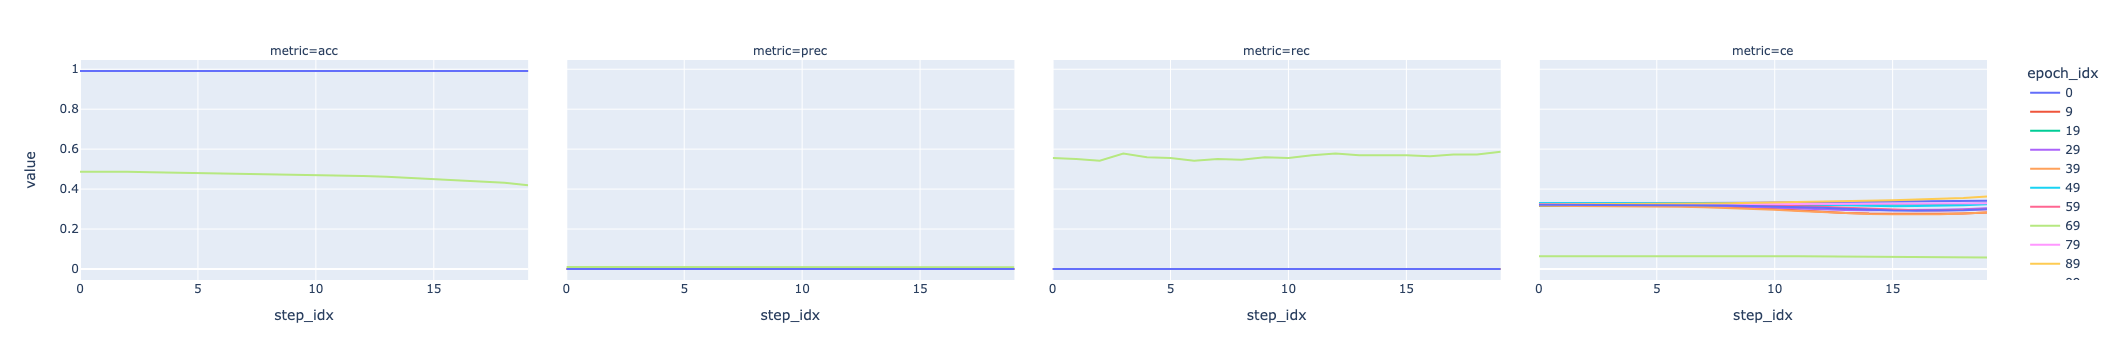

In [18]:
import plotly.express as px

fig = px.line(df_X_Gt_a, x="step_idx", y="value", color='epoch_idx', facet_col='metric')
fig.show()

# Epoch 19 

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

In [12]:
path = "/home/jiahang/DiGress/chain_results/2024-04-26/13-19-47-protein-debug/protein-debug/valid/19.pkl"
import pickle
with open(path, 'rb') as f:
    metrics = pickle.load(f)
with open('./tmp.pkl', 'rb') as f:
    chains = pickle.load(f)

In [13]:
metrics

{'Gs': {'acc': tensor([0.9777, 0.9817, 0.9849, 0.9885, 0.9905, 0.9918, 0.9922, 0.9897, 0.9818,
          0.9622]),
  'prec': tensor([0.9711, 0.9763, 0.9804, 0.9851, 0.9876, 0.9894, 0.9900, 0.9871, 0.9788,
          0.9710]),
  'rec': tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9999, 0.9997, 0.9988,
          0.9875]),
  'ce': tensor([0.1235, 0.1250, 0.1266, 0.1284, 0.1305, 0.1330, 0.1357, 0.1382, 0.1389,
          0.1309])},
 'G0': {'acc': tensor([0.7839, 0.7851, 0.7868, 0.7879, 0.7888, 0.7895, 0.7878, 0.7809, 0.7545,
          0.6551]),
  'prec': tensor([0.7286, 0.7296, 0.7311, 0.7320, 0.7325, 0.7326, 0.7305, 0.7235, 0.6993,
          0.6229]),
  'rec': tensor([0.9891, 0.9892, 0.9895, 0.9900, 0.9910, 0.9926, 0.9942, 0.9959, 0.9982,
          0.9997]),
  'ce': tensor([0.0871, 0.0881, 0.0891, 0.0901, 0.0913, 0.0924, 0.0934, 0.0938, 0.0926,
          0.0863])}}

In [18]:
G0, Gs_Gt, Gs_G0 = chains['G0'].cpu(), chains['Gs_Gt'].cpu(), chains['Gs_G0'].cpu()

In [25]:
roc_auc_score(G0[-1] > 0.5, Gs_Gt[-1])

0.9741966126148514

In [24]:
Gs_Gt[-1]

tensor([0.0000, 0.8546, 0.7918,  ..., 0.8519, 0.8614, 0.0000])

In [26]:
G0[-1]

tensor([0.0000, 0.3145, 0.3145,  ..., 0.6360, 0.6681, 0.0000],
       dtype=torch.float64)

In [28]:
fpr, tpr, thresholds = roc_curve(G0[-1] > 0.5, Gs_Gt[-1])

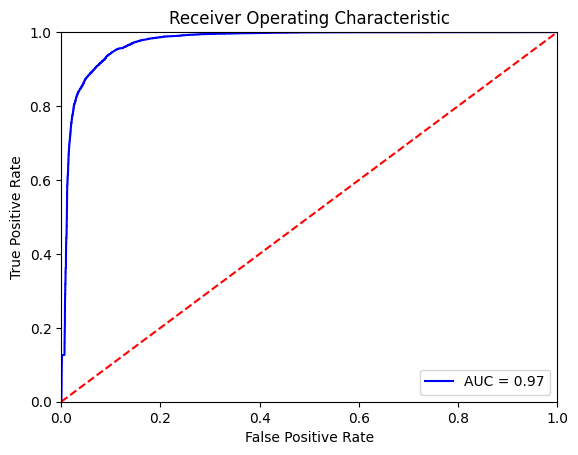

In [30]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_score(G0[-1] > 0.5, Gs_Gt[-1]))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
thresholds[-10:]

array([0.68384147, 0.68328273, 0.6832827 , 0.68293667, 0.6826678 ,
       0.68253016, 0.6815943 , 0.68106186, 0.67914516, 0.        ],
      dtype=float32)

In [38]:
G0[-1]

tensor([0.0000, 0.3145, 0.3145,  ..., 0.6360, 0.6681, 0.0000],
       dtype=torch.float64)

In [39]:
Gs_Gt[-1]

tensor([0.0000, 0.8546, 0.7918,  ..., 0.8519, 0.8614, 0.0000])

(array([ 492.,    0.,    0.,  306.,  574.,   14.,   26.,   76.,  166.,
         222.,  298.,  320., 2494.,  440.,  412., 1770., 2304., 1204.,
         974., 1068., 1152., 1332., 1620., 2258., 2724., 3162., 3862.,
        4028., 3980., 3454., 2540., 1790., 1338., 1008.,  818.,  542.,
         470.,  362.,  442.,  298.,  184.,  150.,  154.,  140.,  114.,
          70.,   82.,   52.,   92.,  296.]),
 array([0.        , 0.01999986, 0.03999973, 0.05999959, 0.07999945,
        0.09999932, 0.11999918, 0.13999905, 0.15999891, 0.17999877,
        0.19999864, 0.2199985 , 0.23999836, 0.25999823, 0.27999809,
        0.29999796, 0.31999782, 0.33999768, 0.35999755, 0.37999741,
        0.39999727, 0.41999714, 0.439997  , 0.45999687, 0.47999673,
        0.49999659, 0.51999646, 0.53999632, 0.55999618, 0.57999605,
        0.59999591, 0.61999578, 0.63999564, 0.6599955 , 0.67999537,
        0.69999523, 0.71999509, 0.73999496, 0.75999482, 0.77999469,
        0.79999455, 0.81999441, 0.83999428, 0.85999414, 

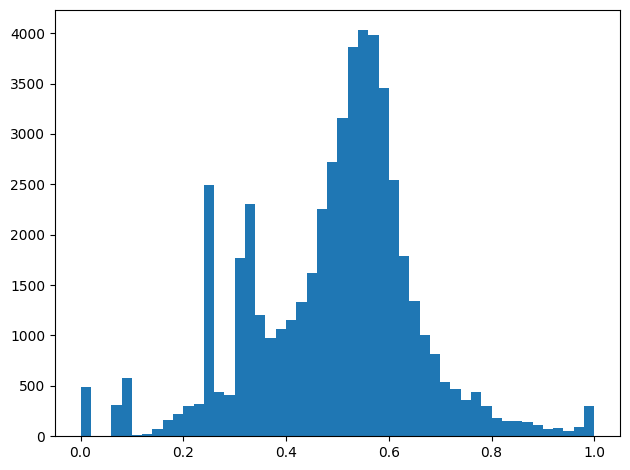

In [84]:
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
nbins=50
# We can set the number of bins with the *bins* keyword argument.
axs.hist(G0[-1], bins=nbins)

(array([  492.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,  9066.,  1352.,   602.,   282.,
          258.,   166.,   250.,   252.,   290.,   226.,   166.,   152.,
          174.,   192.,   244.,   278.,   282.,   338.,   274.,   246.,
          316.,   356.,   498.,   724.,   986.,  1290.,  2116., 29806.]),
 array([0.        , 0.025     , 0.05      , 0.075     , 0.1       ,
        0.125     , 0.15000001, 0.175     , 0.2       , 0.22499999,
        0.25      , 0.27500001, 0.30000001, 0.32499999, 0.34999999,
        0.375     , 0.40000001, 0.42500001, 0.44999999, 0.47499999,
        0.5       , 0.52499998, 0.55000001, 0.57499999, 0.60000002,
        0.625     , 0.64999998, 0.67500001, 0.69999999, 0.72500002,
        0.75      , 0.77499998, 0.80000001, 0.82499999, 0.85000002,
        0.875     , 0.89999998, 0.92500001, 0.94999999, 0.97500002,
        1.        ]),
 <BarContainer object of 40 artists>)

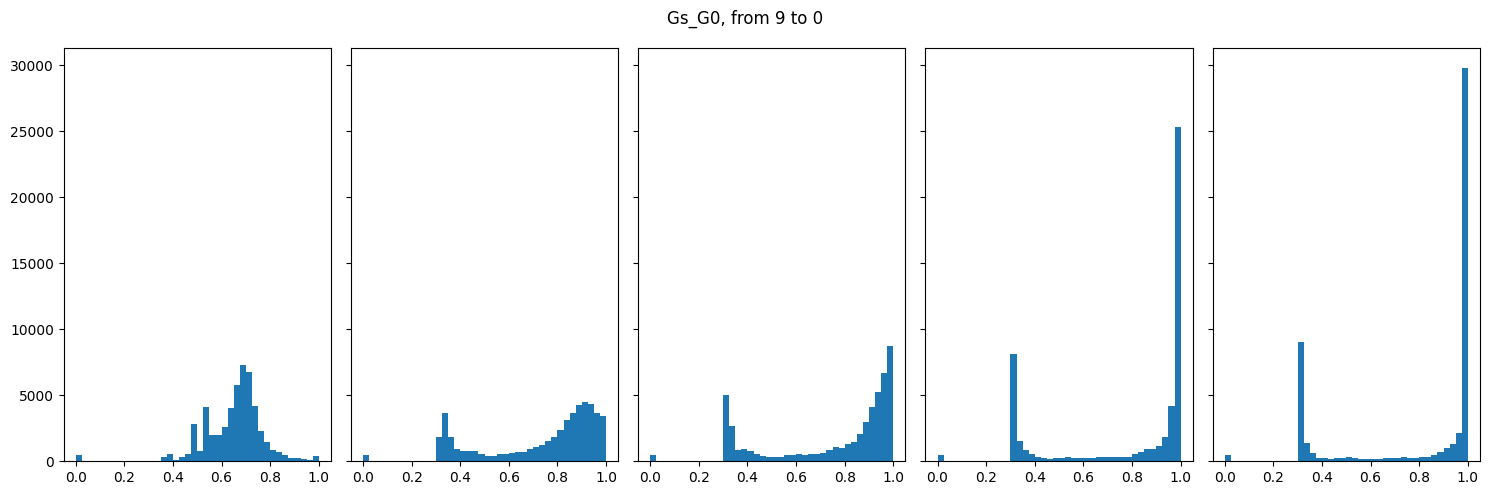

In [56]:
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_G0, from initial to final")
nbins=40
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(Gs_G0[-1], bins=nbins)
axs[1].hist(Gs_G0[-3], bins=nbins)
axs[2].hist(Gs_G0[-4], bins=nbins)
axs[3].hist(Gs_G0[-7], bins=nbins)
axs[4].hist(Gs_G0[-9], bins=nbins)

In [125]:
a = Gs_Gt[0]
a[a > 0].min()

tensor(0.6823)

(0.6, 1.0)

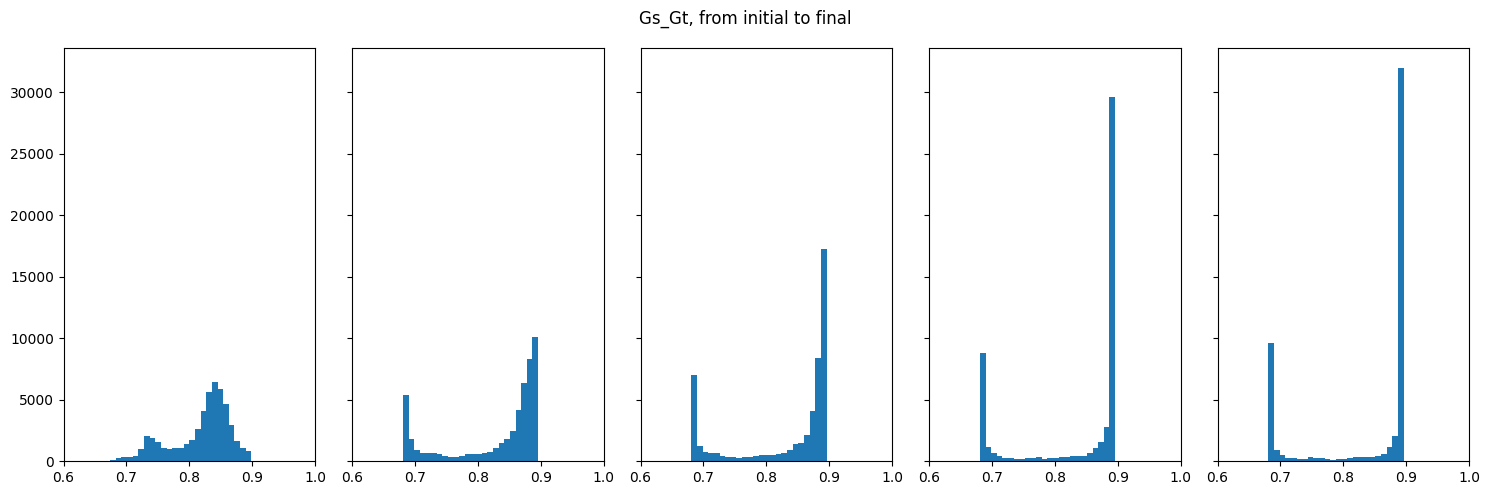

In [71]:
fig, axs = plt.subplots(1, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_Gt, from initial to final")
nbins=100
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(Gs_Gt[-1], bins=nbins)
axs[0].set_xlim([0.6, 1])
axs[1].hist(Gs_Gt[-3], bins=nbins)
axs[1].set_xlim([0.6, 1])
axs[2].hist(Gs_Gt[-4], bins=nbins)
axs[2].set_xlim([0.6, 1])
axs[3].hist(Gs_Gt[-7], bins=nbins)
axs[3].set_xlim([0.6, 1])
axs[4].hist(Gs_Gt[-9], bins=nbins)
axs[4].set_xlim([0.6, 1])

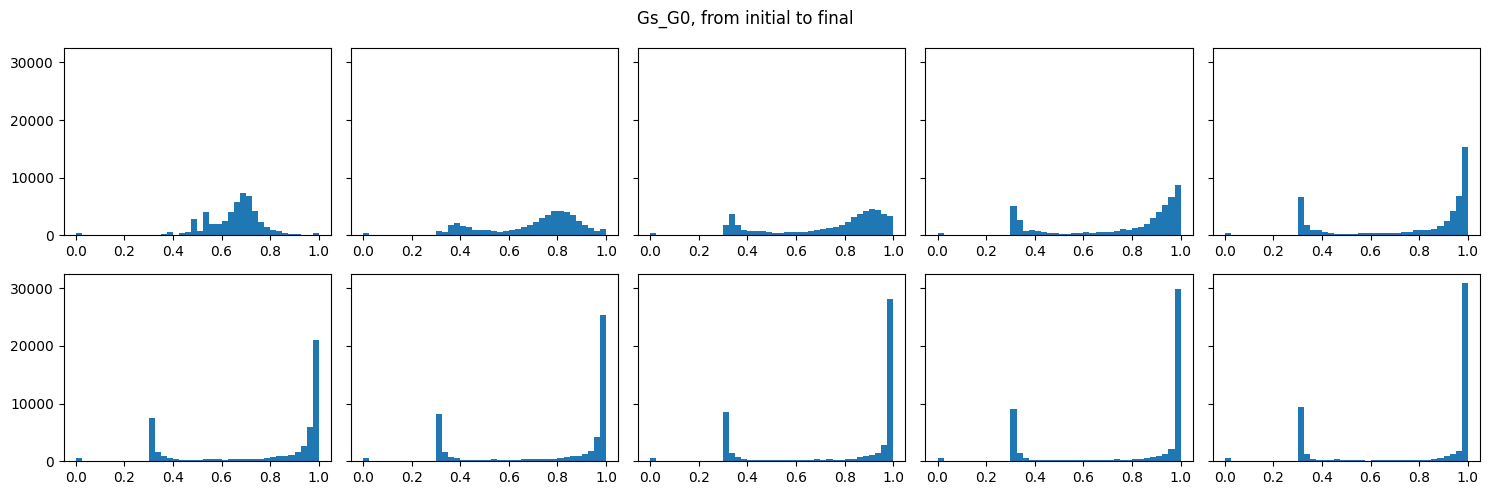

In [76]:
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_G0, from initial to final")
nbins=40
# We can set the number of bins with the *bins* keyword argument.
for i in range(2):
    for j in range(5):
        axs[i][j].hist(Gs_G0[-(i*5 + j + 1)], bins=nbins)

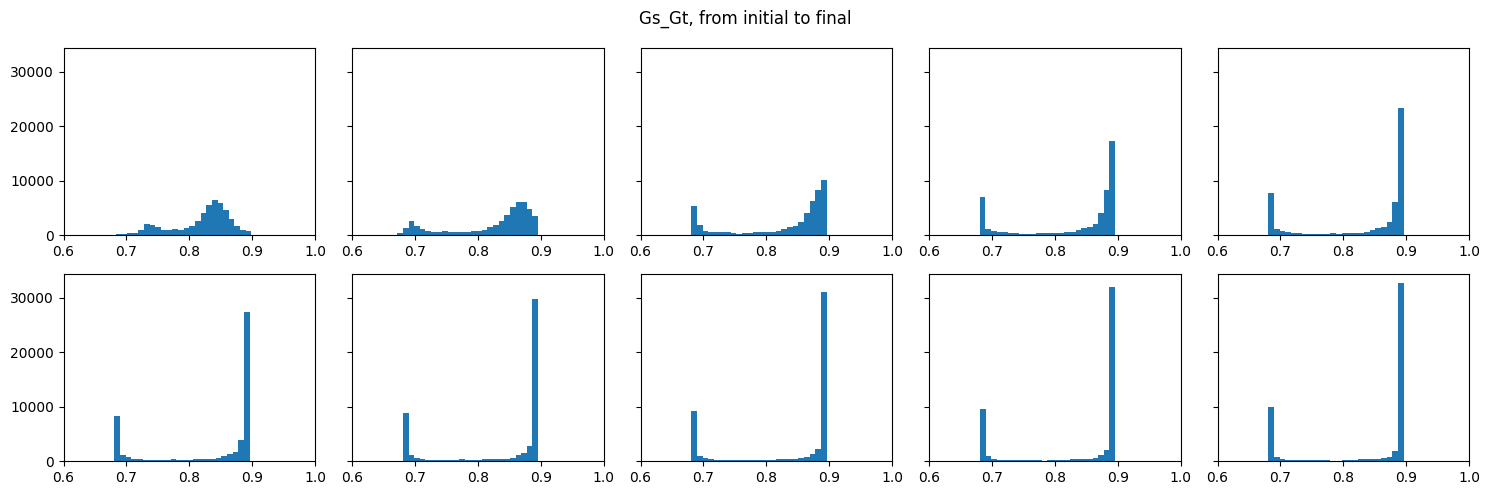

In [78]:
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_Gt, from initial to final")
nbins=100
# We can set the number of bins with the *bins* keyword argument.
for i in range(2):
    for j in range(5):
        axs[i][j].hist(Gs_Gt[-(i*5 + j + 1)], bins=nbins)
        axs[i][j].set_xlim([0.6, 1])

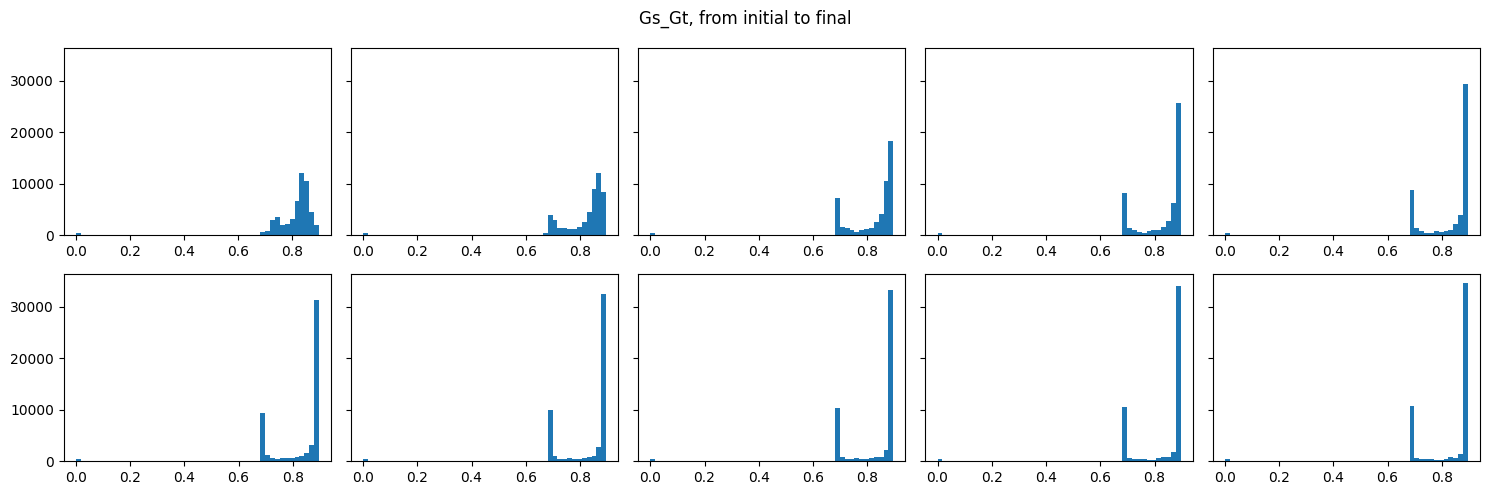

In [138]:
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_Gt, from initial to final")
nbins=50
# We can set the number of bins with the *bins* keyword argument.
for i in range(2):
    for j in range(5):
        axs[i][j].hist(Gs_Gt[-(i*5 + j + 1)], bins=nbins)
        # axs[i][j].set_xlim([0.6, 1])

In [82]:
Gs_G0[-1][Gs_G0[-1] > 0].min()

tensor(0.3603)

# Epoch 9

In [156]:
path = "/home/jiahang/DiGress/chain_results/2024-04-26/13-19-47-protein-debug/protein-debug/valid/9.pkl"
import pickle
with open(path, 'rb') as f:
    metrics = pickle.load(f)
with open('./tmp.pkl', 'rb') as f:
    chains = pickle.load(f)
G0, Gs_Gt, Gs_G0 = chains['G0'].cpu(), chains['Gs_Gt'].cpu(), chains['Gs_G0'].cpu()

In [157]:
roc_auc_score(G0[-1] > 0.5, Gs_Gt[-1])

0.9741966126148514

In [158]:
metrics

{'Gs': {'acc': tensor([0.7603, 0.7634, 0.7652, 0.7682, 0.7704, 0.7729, 0.7768, 0.7835, 0.8061,
          0.9083]),
  'prec': tensor([0.7580, 0.7611, 0.7629, 0.7660, 0.7682, 0.7707, 0.7747, 0.7814, 0.8042,
          0.9074]),
  'rec': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'ce': tensor([0.1694, 0.1699, 0.1705, 0.1713, 0.1723, 0.1736, 0.1752, 0.1776, 0.1809,
          0.1801])},
 'G0': {'acc': tensor([0.5790, 0.5790, 0.5790, 0.5790, 0.5790, 0.5790, 0.5790, 0.5790, 0.5790,
          0.5790]),
  'prec': tensor([0.5750, 0.5750, 0.5750, 0.5750, 0.5750, 0.5750, 0.5750, 0.5750, 0.5750,
          0.5750]),
  'rec': tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'ce': tensor([0.1054, 0.1059, 0.1065, 0.1072, 0.1082, 0.1095, 0.1113, 0.1139, 0.1178,
          0.1204])}}

In [150]:
path = "/home/jiahang/DiGress/chain_results/2024-04-26/13-19-47-protein-debug/protein-debug/test/20.pkl"
import pickle
with open(path, 'rb') as f:
    metrics = pickle.load(f)
with open('./tmp.pkl', 'rb') as f:
    chains = pickle.load(f)

In [151]:
G0, Gs_Gt, Gs_G0 = chains['G0'].cpu(), chains['Gs_Gt'].cpu(), chains['Gs_G0'].cpu()

In [152]:
roc_auc_score(G0[-1] > 0.5, Gs_Gt[-1])

0.9741966126148514

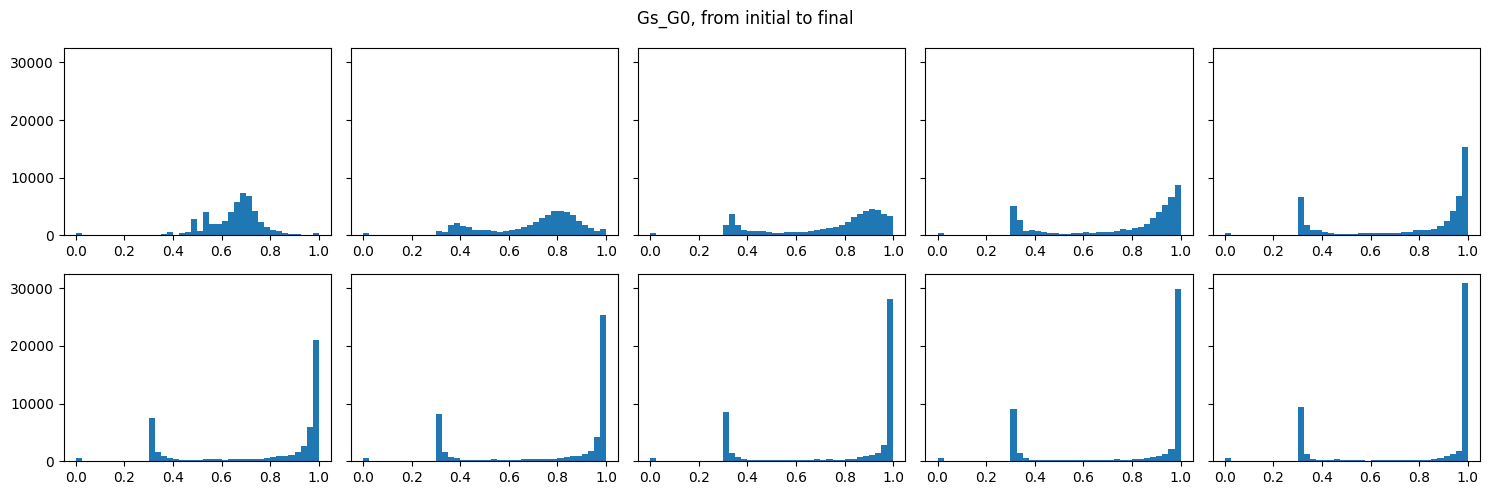

In [153]:
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_G0, from initial to final")
nbins=40
# We can set the number of bins with the *bins* keyword argument.
for i in range(2):
    for j in range(5):
        axs[i][j].hist(Gs_G0[-(i*5 + j + 1)], bins=nbins)

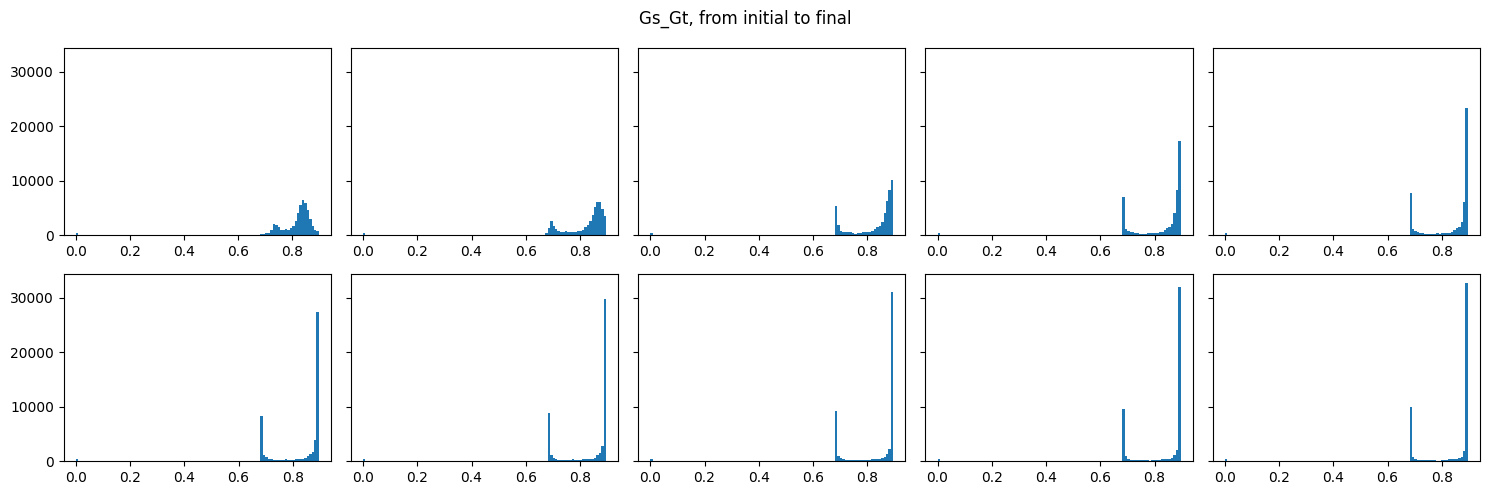

In [154]:
fig, axs = plt.subplots(2, 5, sharey=True, tight_layout=True, figsize=(15, 5))
fig.suptitle("Gs_Gt, from initial to final")
nbins=100
# We can set the number of bins with the *bins* keyword argument.
for i in range(2):
    for j in range(5):
        axs[i][j].hist(Gs_Gt[-(i*5 + j + 1)], bins=nbins)
        # axs[i][j].set_xlim([0.6, 1])

# check dataset distribution

In [85]:
path = "/home/jiahang/DiGress/data/ND-code-datasets/Application2-protein-contact-maps/full-predictions/network_all_0.01.pt"

In [88]:
import torch
data, slices = torch.load(path)

In [89]:
data

Data(x=[3508, 1], edge_index=[2, 512540], edge_attr=[512540], y=[30, 0], n_nodes=[30])

In [91]:
data.edge_attr

tensor([-0.0156, -0.0156, -0.0156,  ...,  0.0167,  0.0653, -0.0212],
       dtype=torch.float64)

(array([4.80000e+01, 0.00000e+00, 2.00000e+00, 6.00000e+00, 6.00000e+01,
        1.40000e+01, 1.80000e+01, 7.70000e+01, 8.10000e+01, 2.60000e+01,
        6.40000e+01, 3.05000e+02, 1.82000e+02, 5.76000e+02, 2.69000e+02,
        1.63600e+03, 5.60000e+02, 2.01200e+03, 1.15710e+04, 1.40890e+04,
        2.93940e+04, 4.46400e+04, 9.04320e+04, 1.69096e+05, 9.30440e+04,
        2.52680e+04, 9.97200e+03, 5.07000e+03, 3.07200e+03, 2.12200e+03,
        1.65400e+03, 1.26400e+03, 1.03400e+03, 8.52000e+02, 7.50000e+02,
        5.70000e+02, 5.16000e+02, 3.40000e+02, 4.56000e+02, 2.06000e+02,
        1.84000e+02, 1.94000e+02, 1.44000e+02, 1.16000e+02, 7.60000e+01,
        6.80000e+01, 7.00000e+01, 6.00000e+01, 6.40000e+01, 3.40000e+01,
        2.40000e+01, 2.00000e+01, 2.20000e+01, 1.80000e+01, 8.00000e+00,
        1.40000e+01, 1.00000e+01, 1.80000e+01, 6.00000e+00, 8.00000e+00,
        1.20000e+01, 2.00000e+00, 8.00000e+00, 6.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

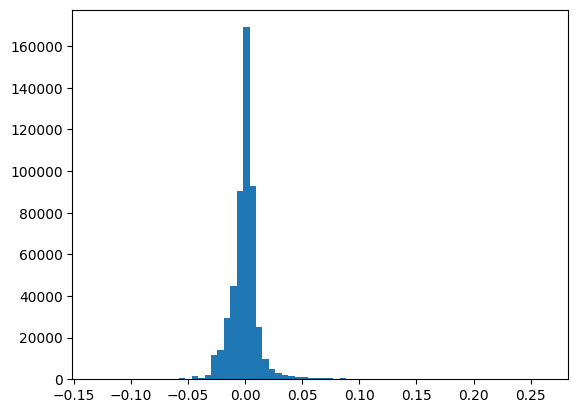

In [94]:
plt.hist(data.edge_attr, bins=70)

In [95]:
data.edge_attr.max()

tensor(0.2633, dtype=torch.float64)

In [96]:
data.edge_attr.min()

tensor(-0.1313, dtype=torch.float64)

In [97]:
data.edge_attr.mean()

tensor(-6.0028e-18, dtype=torch.float64)

In [99]:
from scipy.stats import skew
skew(data.edge_attr.numpy())

2.2590148643648664

In [100]:
def slope_sigmoid(data, slope=1.):
    if slope == 1.:
        from torch.nn.functional import sigmoid
        return sigmoid(data)
    else:
        return 1. / (1. + torch.exp(- slope * data))

In [101]:
edge_prob = slope_sigmoid(data.edge_attr, 50)

(array([  292.,   102.,   371.,   220.,   520.,   144.,  1359.,   382.,
          164.,   356.,   262.,  1338.,   578.,  4948.,  2453.,  4018.,
         3839.,  4072.,  4386.,  2426.,  2228.,  8184.,  3840., 14522.,
         4096., 21844.,  5856.,  7550.,  8918., 11498., 14532., 19320.,
        26066., 32034., 35536., 35784., 35018., 33212., 29196., 25226.,
        20822., 16546., 12128.,  8556.,  6752.,  5238.,  4122.,  3642.,
         3124.,  2504.,  2040.,  1668.,  1410.,  1506.,  1442.,  1148.,
          956.,   988.,   950.,   904.,   766.,   824.,   782.,   756.,
          808.,   812.,   920.,   914.,  1126.,  1696.]),
 array([0.0014058 , 0.0156714 , 0.029937  , 0.04420261, 0.05846821,
        0.07273382, 0.08699942, 0.10126502, 0.11553063, 0.12979623,
        0.14406184, 0.15832744, 0.17259304, 0.18685865, 0.20112425,
        0.21538986, 0.22965546, 0.24392107, 0.25818667, 0.27245227,
        0.28671788, 0.30098348, 0.31524909, 0.32951469, 0.34378029,
        0.3580459 , 0.3723

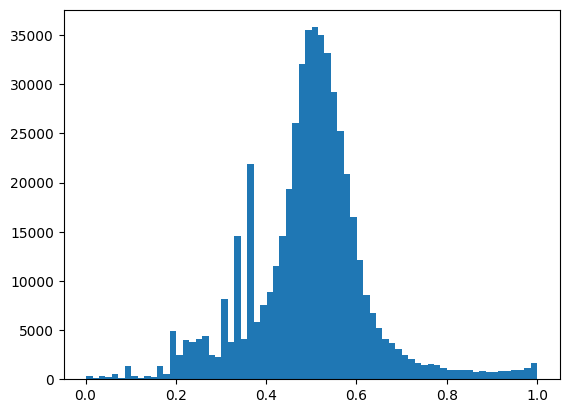

In [103]:
plt.hist(edge_prob, bins=70)

In [104]:
skew(edge_prob)

0.21262937739448795

In [117]:
# get original datasets
from tqdm import tqdm
import os
import numpy as np
adj_list = []
files = os.listdir('/home/jiahang/DiGress/data/ND-code-datasets/Application2-protein-contact-maps/full-predictions')
for filename in tqdm(files):
    if filename.endswith('.mat') or filename.endswith('.pt') or'_ND_' in filename \
        or ('DI_' not in filename and 'MI_' not in filename):
        continue
    adj_path = os.path.join('/home/jiahang/DiGress/data/ND-code-datasets/Application2-protein-contact-maps/full-predictions', filename)
    adj = np.load(adj_path).flatten()
    adj_list.append(adj)
adj = np.concatenate(adj_list)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 163/163 [00:00<00:00, 9522.15it/s]


In [119]:
adj.shape

(512540,)

(array([2.50906e+05, 3.46640e+04, 1.99180e+04, 2.36480e+04, 2.50460e+04,
        2.17520e+04, 1.87320e+04, 1.59160e+04, 1.33480e+04, 1.22540e+04,
        1.05200e+04, 9.19000e+03, 7.91800e+03, 6.51200e+03, 5.62400e+03,
        4.73200e+03, 4.04000e+03, 3.53600e+03, 3.07200e+03, 2.64800e+03,
        2.29800e+03, 2.02800e+03, 1.77400e+03, 1.64200e+03, 1.40600e+03,
        1.28800e+03, 1.14600e+03, 1.01000e+03, 8.42000e+02, 8.06000e+02,
        7.48000e+02, 5.72000e+02, 4.28000e+02, 4.10000e+02, 3.16000e+02,
        2.88000e+02, 2.48000e+02, 2.32000e+02, 2.04000e+02, 1.18000e+02,
        1.52000e+02, 1.24000e+02, 7.20000e+01, 6.80000e+01, 6.20000e+01,
        5.40000e+01, 3.80000e+01, 1.80000e+01, 3.80000e+01, 2.80000e+01,
        2.00000e+01, 1.40000e+01, 2.20000e+01, 1.40000e+01, 1.00000e+01,
        6.00000e+00, 6.00000e+00, 0.00000e+00, 4.00000e+00, 4.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

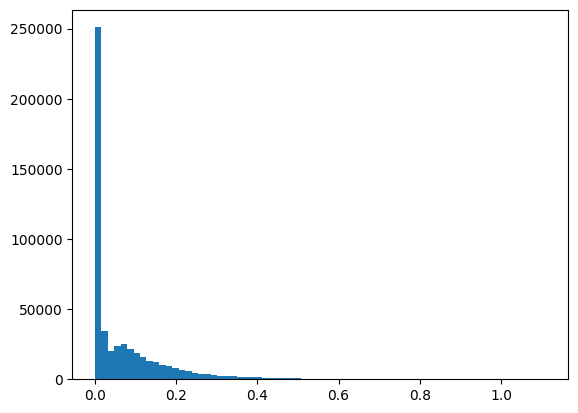

In [120]:
plt.hist(adj, bins=70)

In [121]:
adj.max()

1.1101253026657711

In [122]:
adj.min()

0.0

In [126]:
# G19 (Gt) distribution
with open('/home/jiahang/DiGress/notebooks/tmp1.pkl', 'rb') as f:
    data = pickle.load(f)

(array([2.7200e+02, 5.2800e+02, 2.0000e+00, 3.4000e+01, 6.0000e+01,
        1.3400e+02, 1.4200e+02, 1.7800e+02, 2.0400e+02, 2.1140e+03,
        3.8000e+02, 2.7400e+02, 2.3200e+02, 2.1900e+03, 1.3960e+03,
        7.3800e+02, 5.7000e+02, 5.0800e+02, 4.1800e+02, 3.3400e+02,
        2.7200e+02, 2.1200e+02, 1.8000e+02, 1.5000e+02, 1.9000e+02,
        1.5800e+02, 2.1400e+02, 1.8400e+02, 1.7200e+02, 2.2000e+02,
        1.5200e+02, 1.6600e+02, 1.4600e+02, 1.2800e+02, 1.8600e+02,
        1.3800e+02, 1.7000e+02, 1.9600e+02, 2.0800e+02, 2.5000e+02,
        2.3400e+02, 2.2800e+02, 2.5200e+02, 2.7800e+02, 3.5800e+02,
        4.7400e+02, 7.6400e+02, 1.0960e+03, 1.6660e+03, 3.1432e+04]),
 array([0.06680893, 0.08547275, 0.10413657, 0.12280039, 0.14146421,
        0.16012803, 0.17879185, 0.19745568, 0.2161195 , 0.23478332,
        0.25344714, 0.27211096, 0.29077478, 0.30943861, 0.32810243,
        0.34676625, 0.36543007, 0.38409389, 0.40275771, 0.42142153,
        0.44008536, 0.45874918, 0.477413  , 0.

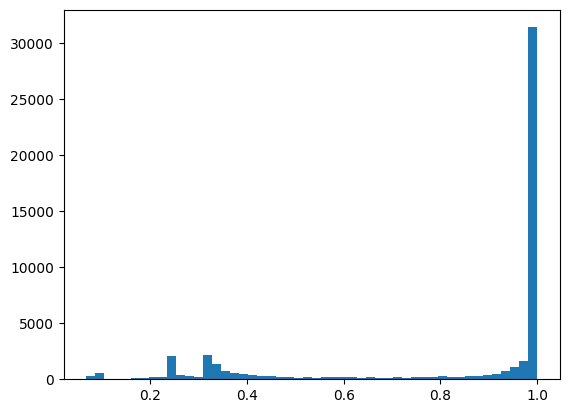

In [127]:
plt.hist(data, bins=50)

In [128]:
with open('/home/jiahang/DiGress/notebooks/tmp2.pkl', 'rb') as f:
    data = pickle.load(f)

In [130]:
data.keys()

dict_keys(['pred_s', 'true_zs', 'true_zt', 'true_s', 'true_t'])

In [140]:
for key, val in data.items():
    val = val[..., -1].flatten()
    val = val[val > 0]
    data[key] = val

Text(0.5, 1.0, 'pred_s')

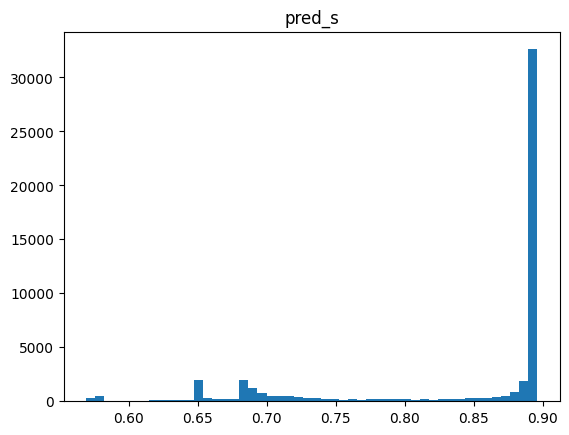

In [142]:
plt.hist(data['pred_s'], bins=50)
plt.title('pred_s')

Text(0.5, 1.0, 'true_zs')

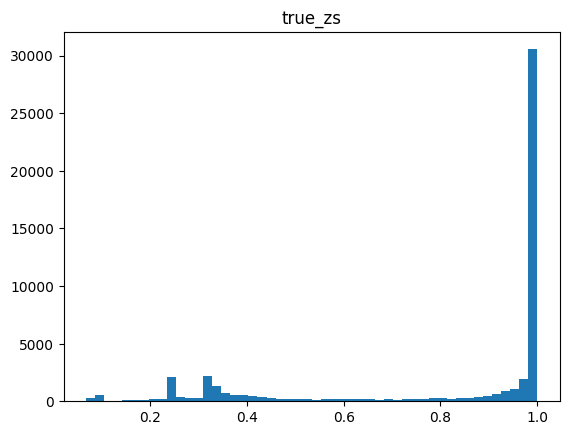

In [147]:
plt.hist(data['true_zs'], bins=50)
plt.title('true_zs')

Text(0.5, 1.0, 'true_zt')

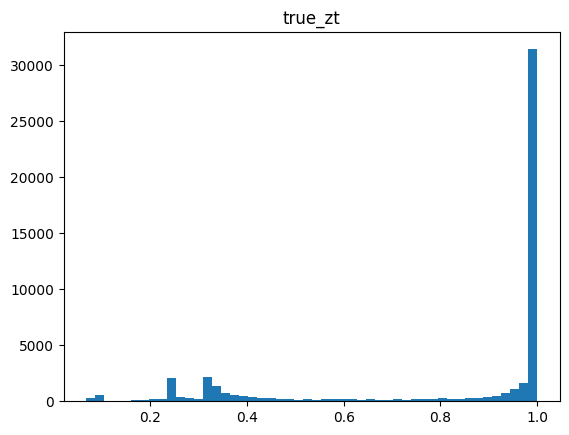

In [144]:
plt.hist(data['true_zt'], bins=50)
plt.title('true_zt')

Text(0.5, 1.0, 'true_s')

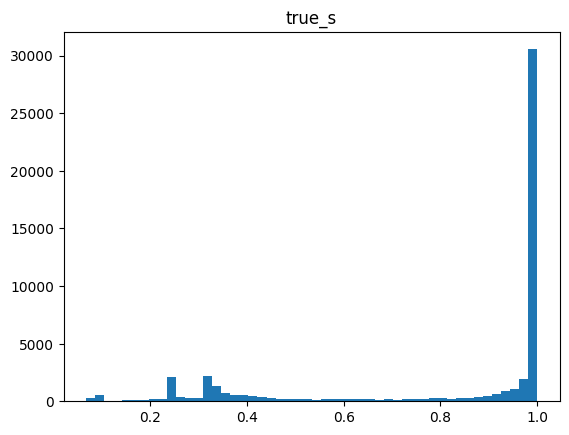

In [148]:
plt.hist(data['true_s'], bins=50)
plt.title('true_s')

Text(0.5, 1.0, 'true_t')

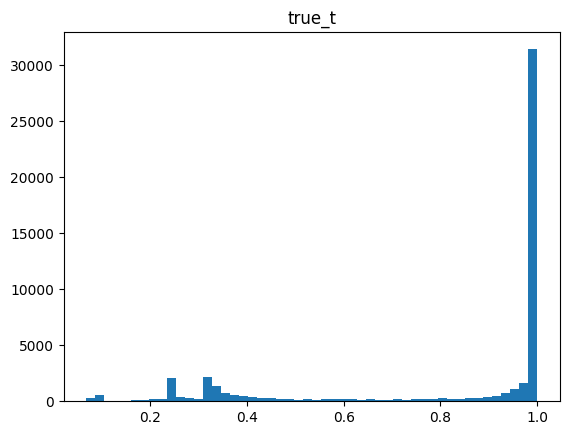

In [149]:
plt.hist(data['true_t'], bins=50)
plt.title('true_t')